In [2]:
import pandas as pd

# Load the Excel file to inspect the structure and contents
file_path = '/content/data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the data
data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [3]:
data.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [4]:
from scipy.stats import zscore

# Convert columns to appropriate types and handle non-numeric values
numeric_columns = [
    'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
    'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
    'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'
]

# Replace non-numeric values (like 'I/O Timeout') with NaN
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values with the median of each column
data_filled = data.fillna(data.median())

# Calculate Z-scores to identify outliers
z_scores = data_filled[numeric_columns].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

print("Outliers by column:", outliers)


Outliers by column: Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          3
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         2
dtype: int64


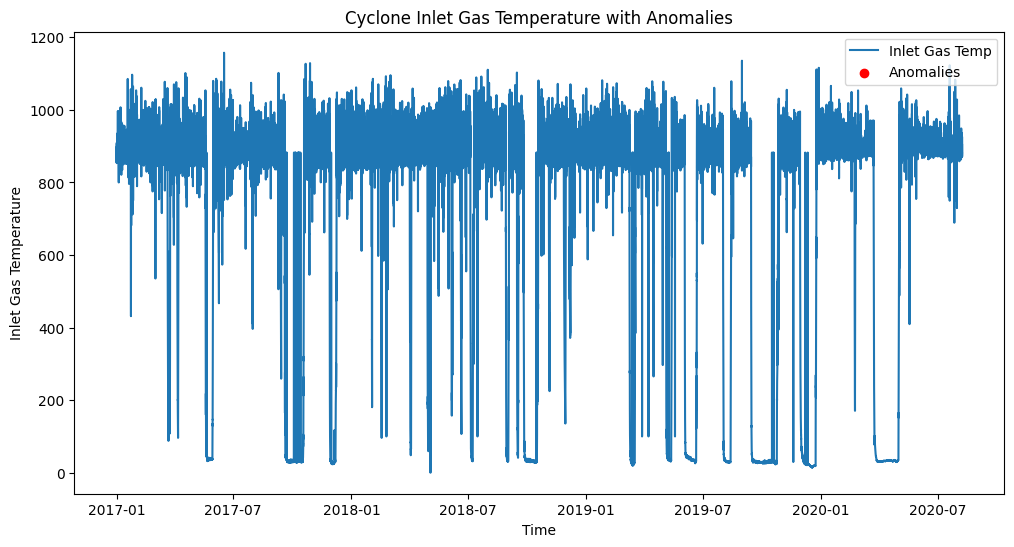

In [5]:
import matplotlib.pyplot as plt

# Plotting time series with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(data_filled['time'], data_filled['Cyclone_Inlet_Gas_Temp'], label='Inlet Gas Temp')

# Highlight anomalies
anomalies = data_filled[z_scores['Cyclone_Inlet_Gas_Temp'].abs() > 3]
plt.scatter(anomalies['time'], anomalies['Cyclone_Inlet_Gas_Temp'], color='red', label='Anomalies')

plt.xlabel('Time')
plt.ylabel('Inlet Gas Temperature')
plt.title('Cyclone Inlet Gas Temperature with Anomalies')
plt.legend()
plt.show()


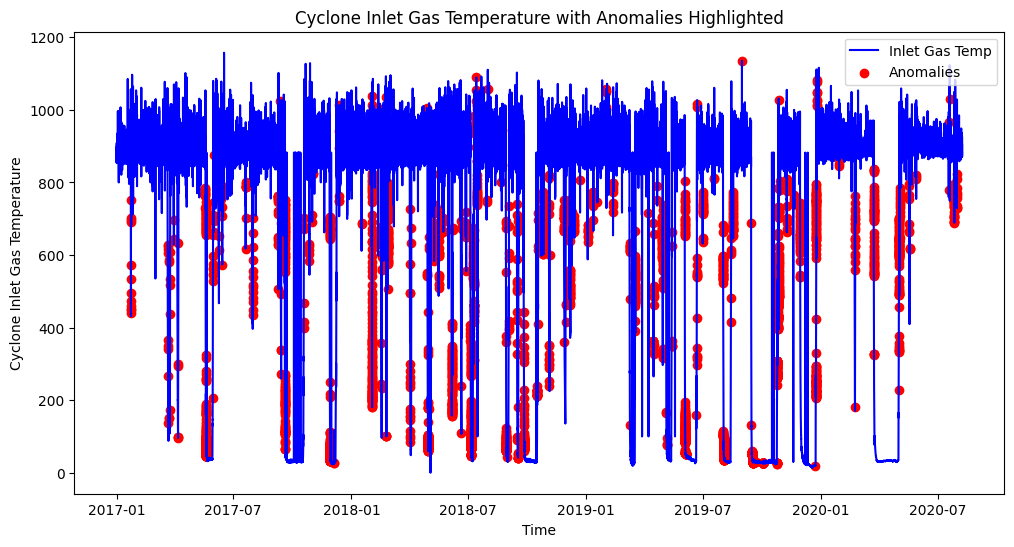

In [6]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Assuming 'data_filled' is the preprocessed DataFrame from previous steps

# 1. Feature Selection (Exclude the 'time' column for Isolation Forest)
features = data_filled[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft',
                        'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']]

# 2. Initialize Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
data_filled['anomaly_score'] = isolation_forest.fit_predict(features)

# 3. Identify anomalies (anomaly_score of -1 indicates an anomaly)
anomalies = data_filled[data_filled['anomaly_score'] == -1]

# 4. Plot time series with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(data_filled['time'], data_filled['Cyclone_Inlet_Gas_Temp'], label='Inlet Gas Temp', color='blue')

# Plot anomalies
plt.scatter(anomalies['time'], anomalies['Cyclone_Inlet_Gas_Temp'], color='red', label='Anomalies')

plt.xlabel('Time')
plt.ylabel('Cyclone Inlet Gas Temperature')
plt.title('Cyclone Inlet Gas Temperature with Anomalies Highlighted')
plt.legend()
plt.show()
